In [2]:
import pandas as pd

df = pd.read_csv('sample_dataframe.csv')
df

/tmp/ipykernel_1402/4239921246.py:3: DtypeWarning: Columns (46,149,155,170) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sample_dataframe.csv')


,NUMENCRIPTADO,TIPO_DOCTO,ADU,FORM,FECVENCI,CODCOMUN,NUM_UNICO_IMPORTADOR,CODPAISCON,DESDIRALM,CODCOMRS,...,SIGVAL2,VAL2,OTRO3,CTA3,SIGVAL3,VAL3,OTRO4,CTA4,SIGVAL4,VAL4
0,19913953,151,39,15,27012023,13132,3499,331,NaN,NaN,...,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0
1,19940004,101,48,15,19012023,13107,3351,225,NaN,13101.0,...,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0
2,19968928,101,33,15,9022023,13107,789,220,NaN,5301.0,...,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0
3,19934414,151,34,15,10022023,8108,59,226,NaN,NaN,...,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0
4,19945340,151,48,15,9022023,13125,6611,506,NaN,13101.0,...,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19937372,151,34,15,8022023,13101,11526,522,NaN,NaN,...,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0
9996,19967725,101,48,15,7022023,13123,1723,510,NaN,13101.0,...,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0
9997,19959434,151,14,15,2022023,13125,8229,225,NaN,NaN,...,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0
9998,19939078,101,48,15,14022023,13123,4909,225,NaN,13101.0,...,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0


In [3]:
# It seems that the information about the product is spread out over multiple columns. Lets combine them into one column
# Then separate them using the "~" character instead of the original separator for the file ";"

# First lets concatenate the columns DNOMBRE, DMARCA, DVARIEDAD, DOTRO1 and DOTRO2 into one column

df['PRODUCTO'] = df['DNOMBRE'].astype(str) + df['DMARCA'].astype(str) + df['DVARIEDAD'].astype(str) + df['DOTRO1'].astype(str) + df['DOTRO2'].astype(str)

# Now lets split the columns using the "~" character to see how many columns we need

df['PRODUCTO'].str.split('~', expand=True)

# We need 12 columns, so lets create 12 new columns with the prefix "product_" and the number of the column

df[['product_1','product_2','product_3','product_4','product_5','product_6','product_7','product_8','product_9','product_10','product_11', 'product_12']] = df['PRODUCTO'].str.split('~', expand=True)





In [4]:
print(df.product_2.unique())

[' STATION WAGON' ' PUNTO DE ACCESO' ' CABLE DE COBRE' ...
 ' SEPARADOR DE ACEITE' ' ROTULA DE CILINDRO' ' GELATINAS ORGANICAS']


In [5]:
 # lets make a summary of the ARANC-ALA column to see if there are zeros in the data

df['ARANC-ALA'].describe()




count    9.909000e+03
mean     3.633983e+07
std      3.687244e+07
min      0.000000e+00
25%      0.000000e+00
50%      3.212100e+07
75%      8.208200e+07
max      9.619009e+07
Name: ARANC-ALA, dtype: float64

In [6]:
# Good thing that ARANC-ALA contains the product codes. Lets display them in plain text instead of scientific notation

df['ARANC-ALA'] = df['ARANC-ALA'].astype(str)



df['ARANC-ALA'].str[:4].unique()

array(['8703', '0.0', '8544', '8708', '8536', '3822', '1511', '9505',
       '9021', '3204', '7102', '8542', '9405', '3304', '6203', '8204',
       '2931', '6110', '8701', '7007', '3402', '2032', '6104', '7326',
       '7318', '8431', '8443', '7312', '5703', '8483', '7323', '9102',
       '8481', '3907', '8516', '8413', '7222', '6204', '2102', '4011',
       '6109', '4016', '3920', '7321', '3812', '8201', '8467', '7403',
       '7210', '9401', 'nan', '8711', '2013', '8207', '8504', '8466',
       '3926', '8485', '4823', '3824', '8414', '8309', '6907', '9603',
       '8409', '8538', '8517', '9026', '8548', '7308', '2101', '6112',
       '2203', '4820', '8441', '2103', '8501', '6202', '1104', '8419',
       '8512', '4009', '8531', '3305', '7304', '2071', '7013', '6212',
       '8539', '8311', '8511', '3004', '2530', '9031', '1512', '8421',
       '3307', '8301', '2104', '2309', '6911', '4819', '2710', '8515',
       '8439', '3917', '7229', '4051', '3209', '8433', '5604', '4802',
       '

In [7]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [8]:
import openpyxl

# Great! Now lets import the product codes from "naladisa_2022.xlsx" and merge them with the dataframe

df2 = pd.read_excel('naladisa_2022.xlsx')

df2

,NALADISA 2022,Unnamed: 1
0,Código,Descripción
1,01,ANIMALES VIVOS
2,0101,"CABALLOS, ASNOS, MULOS Y BURDÉGANOS, VIVOS."
3,01012,Caballos:
4,010121,Reproductores de raza pura
...,...,...
15218,9706,ANTIGÜEDADES DE MÁS DE CIEN AÑOS.
15219,970610,De más de 250 años
15220,97061000,De más de 250 años
15221,970690,Las demás


In [9]:
# This file is a bit messy. It seems that there is a tree structure in the file. Lets keep only the higher hierarchy codes

df2 = df2[df2['NALADISA 2022'].str.len() == 2]

df2

,NALADISA 2022,Unnamed: 1
1,01,ANIMALES VIVOS
88,02,CARNE Y DESPOJOS COMESTIBLES
262,03,"PESCADOS Y CRUSTÁCEOS, MOLUSCOS Y DEMÁS INVERT..."
773,04,LECHE Y PRODUCTOS LÁCTEOS; HUEVOS DE AVE; MIEL...
867,05,LOS DEMÁS PRODUCTOS DE ORIGEN ANIMAL NO EXPRES...
...,...,...
14716,93,"ARMAS, MUNICIONES, Y SUS PARTES Y ACCESORIOS"
14812,94,MUEBLES; MOBILIARIO MEDICOQUIRÚRGICO; ARTÍCULO...
14942,95,"JUGUETES, JUEGOS Y ARTÍCULOS PARA RECREO O DEP..."
15048,96,MANUFACTURAS DIVERSAS


In [10]:
# Lets merge the dataframes. We will use the "ARANC-ALA" column from the original dataframe and the "NALADISA 2022" column from the new dataframe
# To do this, we will use the first 3 digits from "ARANC-ALA" column as the key for the merge

df3 = pd.merge(df, df2, left_on=df['ARANC-ALA'].str[:2], right_on=df2['NALADISA 2022'], how='left')

df3

,key_0,NUMENCRIPTADO,TIPO_DOCTO,ADU,FORM,FECVENCI,CODCOMUN,NUM_UNICO_IMPORTADOR,CODPAISCON,DESDIRALM,...,product_5,product_6,product_7,product_8,product_9,product_10,product_11,product_12,NALADISA 2022,Unnamed: 1
0,87,19913953,151,39,15,27012023,13132,3499,331,NaN,...,XV 2.0I AWD CVT LTD,2022,2000CC,AUTOMATICA,PBV 1430 KB. 4X4nannan,None,None,None,87,"VEHÍCULOS AUTOMÓVILES, TRACTORES, VELOCÍPEDOS ..."
1,0.,19940004,101,48,15,19012023,13107,3351,225,NaN,...,"CON ACCESORIOS DE MONTAJE, PARA COMUNICACIONES...",None,None,None,None,None,None,None,NaN,NaN
2,85,19968928,101,33,15,9022023,13107,789,220,NaN,...,CONDUCTORES ELECTRICOSPROVISTOS DE PIEZAS DE ...,None,None,None,None,None,None,None,85,"MÁQUINAS, APARATOS Y MATERIAL ELÉCTRICO, Y SUS..."
3,87,19934414,151,34,15,10022023,8108,59,226,NaN,...,PARTE EXCLUSIVAPARA EJE CON DIFERENCIAL DE VE...,None,None,None,None,None,None,None,87,"VEHÍCULOS AUTOMÓVILES, TRACTORES, VELOCÍPEDOS ..."
4,85,19945340,151,48,15,9022023,13125,6611,506,NaN,...,None,None,None,None,None,None,None,None,85,"MÁQUINAS, APARATOS Y MATERIAL ELÉCTRICO, Y SUS..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,84,19937372,151,34,15,8022023,13101,11526,522,NaN,...,EXCLUSIVAS PARA EQUIPOS DEREFRIGERACION INDUS...,nannan,None,None,None,None,None,None,84,"REACTORES NUCLEARES, CALDERAS, MÁQUINAS, APARA..."
9996,85,19967725,101,48,15,7022023,13123,1723,510,NaN,...,ENPAQUETES PARA AUDIFONOSnannannan,None,None,None,None,None,None,None,85,"MÁQUINAS, APARATOS Y MATERIAL ELÉCTRICO, Y SUS..."
9997,0.,19959434,151,14,15,2022023,13125,8229,225,NaN,...,ACCESORIOS EXCLUSIVOS PARA MAQUINARIAS DE LA ...,None,None,None,None,None,None,None,NaN,NaN
9998,0.,19939078,101,48,15,14022023,13123,4909,225,NaN,...,"PARA SWITCH, CONECTIVIDAD DE FIBRA PARA AMPLI...",None,None,None,None,None,None,None,NaN,NaN


In [11]:
# Unfortunately, there are many missing values, coded as "zero"
# 

In [12]:
# TOT_PESO (total weight) is currently a string with a comma as a decimal separator. Lets convert it to a float

df3['TOT_PESO'] = df3['TOT_PESO'].str.replace(',','.').astype(float)

In [13]:
# Lets see what is the average weight of the products for each category

df3.groupby('Unnamed: 1')['TOT_PESO'].mean()

Unnamed: 1
ABONOS                                                                                                                                                       183326.781667
ACEITES ESENCIALES Y RESINOIDES; PREPARACIONES DE PERFUMERÍA, DE TOCADOR O DE COSMÉTICA                                                                       21519.494195
AERONAVES, VEHÍCULOS ESPACIALES, Y SUS PARTES                                                                                                                    20.220000
ALFOMBRAS Y DEMÁS REVESTIMIENTOS PARA EL SUELO, DE MATERIA TEXTIL                                                                                              9935.485000
ALGODÓN                                                                                                                                                        1070.540000
                                                                                                                                      

In [14]:
# Hmm, we seem to be missing the weight measurement unit. 
# The column that has that information is MEDIDA, so lets see a cross table of MEDIDA value counts

pd.crosstab(index=df3['MEDIDA'], columns="count")

col_0,count
MEDIDA,
5,2
6,6657
9,38
10,3095
12,2
15,64
16,3
17,139


In [15]:
# The most common measurement unit is 6 ("Kilogramo" according to the data dictionary), so lets create a filtered dataframe with only those values

df4 = df3[df3['MEDIDA'] == 6]

In [16]:
df4.groupby('Unnamed: 1')['TOT_PESO'].mean()

# Lets create a cross table of the category and TOT_PESO mean, order
# Also lets trim the labels for long names

pd.crosstab(index=df4['Unnamed: 1'], columns="mean", values=df4['TOT_PESO'], aggfunc='mean').sort_values(by='mean', ascending=False).head(10).rename_axis('Category').rename(columns={'mean':'Average weight (kg)'})

col_0,Average weight (kg)
Category,
"COMBUSTIBLES MINERALES, ACEITES MINERALES Y PRODUCTOS DE SU DESTILACIÓN; MATERIAS BITUMINOSAS; CERAS MINERALES",1.529408e+06
"PRODUCTOS QUÍMICOS INORGÁNICOS; COMPUESTOS INORGÁNICOS U ORGÁNICOS DE METAL PRECIOSO, DE ELEMENTOS RADIACTIVOS, DE METALES DE LAS TIERRAS RARAS O DE ISÓTOPOS",8.402870e+05
"SAL; AZUFRE; TIERRAS Y PIEDRAS; YESOS, CALES Y CEMENTOS",7.481775e+05
ABONOS,1.833268e+05
"FUNDICIÓN, HIERRO Y ACERO",1.786977e+05
PRODUCTOS DE LA MOLINERÍA; MALTA; ALMIDÓN Y FÉCULA; INULINA; GLUTEN DE TRIGO,9.012526e+04
CEREALES,6.157905e+04
SEMILLAS Y FRUTOS OLEAGINOSOS; SEMILLAS Y FRUTOS DIVERSOS; PLANTAS INDUSTRIALES O MEDICINALES; PAJA Y FORRAJE,5.809270e+04
"GRASAS Y ACEITES, ANIMALES, VEGETALES O DE ORIGEN MICROBIANO, Y PRODUCTOS DE SU DESDOBLAMIENTO; GRASAS ALIMENTICIAS ELABORADAS; CERAS DE ORIGEN ANIMAL O VEGETAL",4.756061e+04


/tmp/ipykernel_1402/2390773911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['avg_item_weight'] = df4.TOT_PESO/df4.TOT_ITEMS


<Axes: title={'center': 'Average item weight per category (kg)'}, ylabel='Unnamed: 1'>

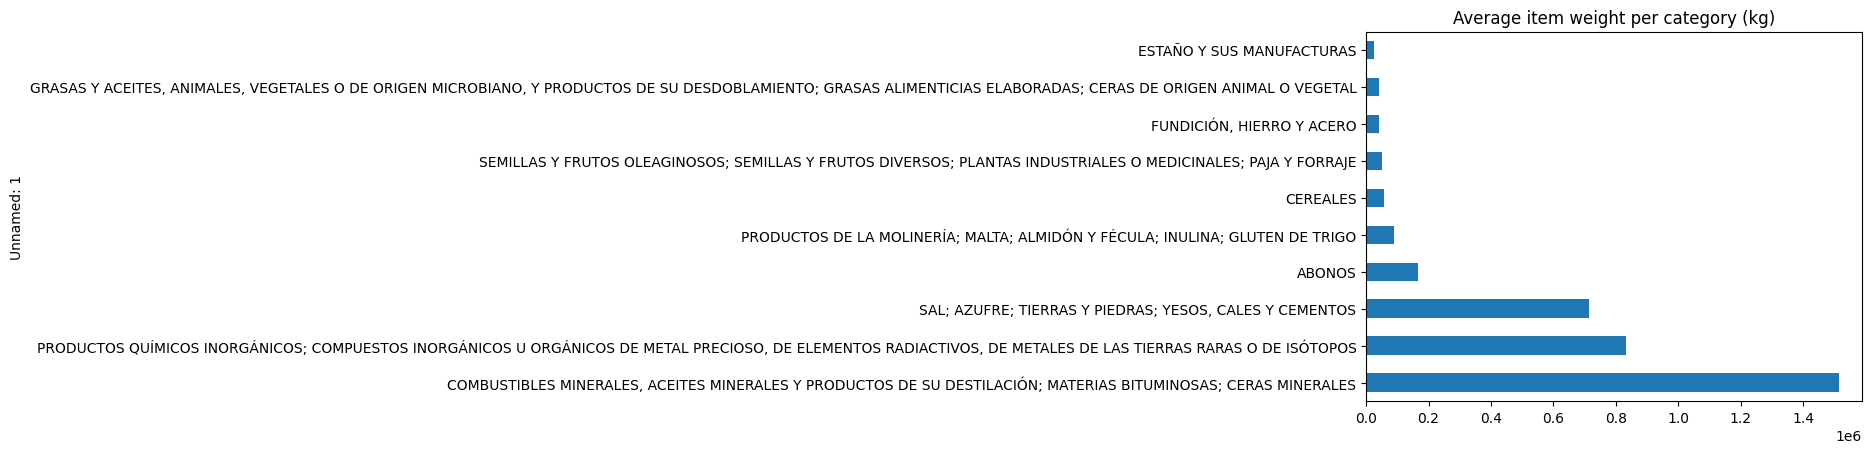

In [17]:
# That is the average weight of the shipment, but we are interested in the average weight of the product.
# Lets divide the average weight of the shipment by the number of products in the shipment (TOT_ITEMS)

df4['avg_item_weight'] = df4.TOT_PESO/df4.TOT_ITEMS

# Now lets see the average item weight per category using bar charts

import matplotlib.pyplot as plt

df4.groupby('Unnamed: 1')['avg_item_weight'].mean().sort_values(ascending=False).head(10).plot(kind='barh', title='Average item weight per category (kg)')

<Axes: title={'center': 'Average item weight per product (kg)'}, ylabel='product_2'>

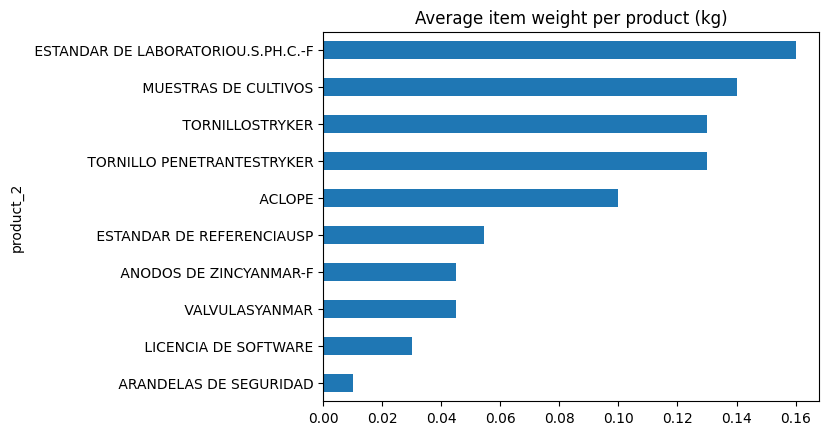

In [18]:
# Now for a specific category lets explore the average item weight product name (product_2)

df4.groupby('product_2')['avg_item_weight'].mean().sort_values(ascending=True).head(10).plot(kind='barh', title='Average item weight per product (kg)')

In [19]:
# Interesting. Lets see the stdev of the average item weight per product and the sum of item numbers TOT_ITEMS

df4.groupby('Unnamed: 1')['avg_item_weight'].agg(['mean', 'std', 'sum', 'count']).sort_values(by='count', ascending=False).head(20)

,mean,std,sum,count
Unnamed: 1,,,,
"REACTORES NUCLEARES, CALDERAS, MÁQUINAS, APARATOS Y ARTEFACTOS MECÁNICOS; PARTES DE ESTAS MÁQUINAS O APARATOS",688.010957,2781.823950,3.921662e+05,570
PLÁSTICO Y SUS MANUFACTURAS,5176.227856,12771.722089,1.915204e+06,370
"ACEITES ESENCIALES Y RESINOIDES; PREPARACIONES DE PERFUMERÍA, DE TOCADOR O DE COSMÉTICA",1448.999385,10006.612517,4.318018e+05,298
"MANUFACTURAS DE FUNDICIÓN, HIERRO O ACERO",4278.858631,25228.510984,1.125340e+06,263
"PREPARACIONES DE HORTALIZAS, FRUTAS U OTROS FRUTOS O DEMÁS PARTES DE PLANTAS",8156.604272,13423.482485,2.030994e+06,249
"MÁQUINAS, APARATOS Y MATERIAL ELÉCTRICO, Y SUS PARTES; APARATOS DE GRABACIÓN O REPRODUCCIÓN DE SONIDO, APARATOS DE GRABACIÓN O REPRODUCCIÓN DE IMAGEN Y SONIDO EN TELEVISIÓN, Y LAS PARTES Y ACCESORIOS DE ESTOS APARATOS",1020.042365,5957.744249,2.499104e+05,245
"VEHÍCULOS AUTOMÓVILES, TRACTORES, VELOCÍPEDOS Y DEMÁS VEHÍCULOS TERRESTRES; SUS PARTES Y ACCESORIOS",819.972367,1786.697482,1.492350e+05,182
"PAPEL Y CARTÓN; MANUFACTURAS DE PASTA DE CELULOSA, DE PAPEL O CARTÓN",18511.913143,40265.081789,2.499108e+06,135
CAUCHO Y SUS MANUFACTURAS,2897.019984,8669.653942,3.418484e+05,118


<Axes: xlabel='Unnamed: 1', ylabel='avg_item_weight'>

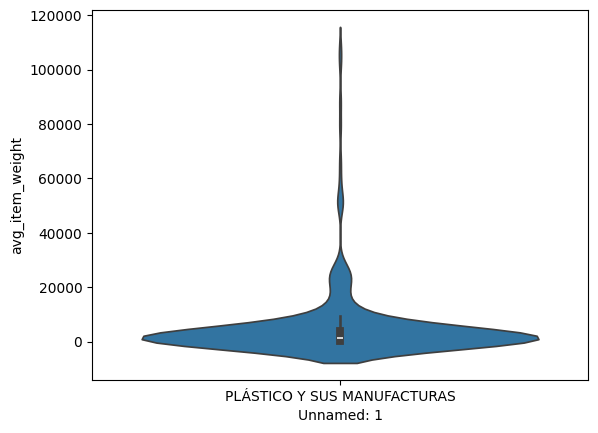

In [21]:
# Lets make a violin plot of the PLÁSTICO Y SUS MANUFACTURAS category, for the average item weight
# Lets use seaborn for this

import seaborn as sns

# First lets create a dataframe with only the PLÁSTICO Y SUS MANUFACTURAS category

df4[df4['Unnamed: 1'] == 'PLÁSTICO Y SUS MANUFACTURAS']

# Now lets plot the violin plot for the

sns.violinplot(data=df4[df4['Unnamed: 1'] == 'PLÁSTICO Y SUS MANUFACTURAS'], x='Unnamed: 1', y='avg_item_weight')


<Axes: title={'center': 'Average item weight per product (kg)'}, ylabel='product_2'>

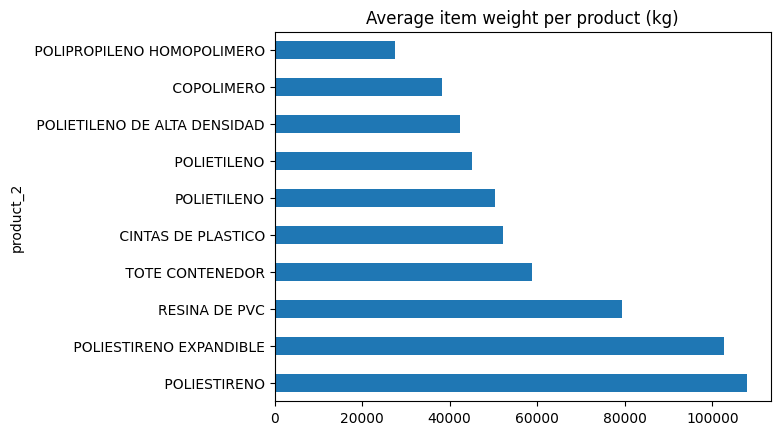

In [34]:
# We can see that most of the items have less than 10000 kg, but there are some outliers that are much heavier
# Lets try to visualize the outliers product names (product_2)

df4[df4['Unnamed: 1'] == 'PLÁSTICO Y SUS MANUFACTURAS'].groupby('product_2')['avg_item_weight'].mean().sort_values(ascending=False).head(10).plot(kind='barh', title='Average item weight per product (kg)')